In [122]:
import pandas as pd
harm_cols = ['UMN', 'UCO', 'UCS','UBA', 'USN', 'UTL','UTU', 'UCD', 'UMO', 'USB', 'UPB', 'UHG', 'UTAS']
df = pd.read_csv('all_LODS_by_cohort.csv')
df = df[df['Analyte'].isin(harm_cols)]
unm_lods_df = pd.read_csv('UNM_LODs_Julia.csv')
df = pd.concat([df, unm_lods_df], axis = 0)

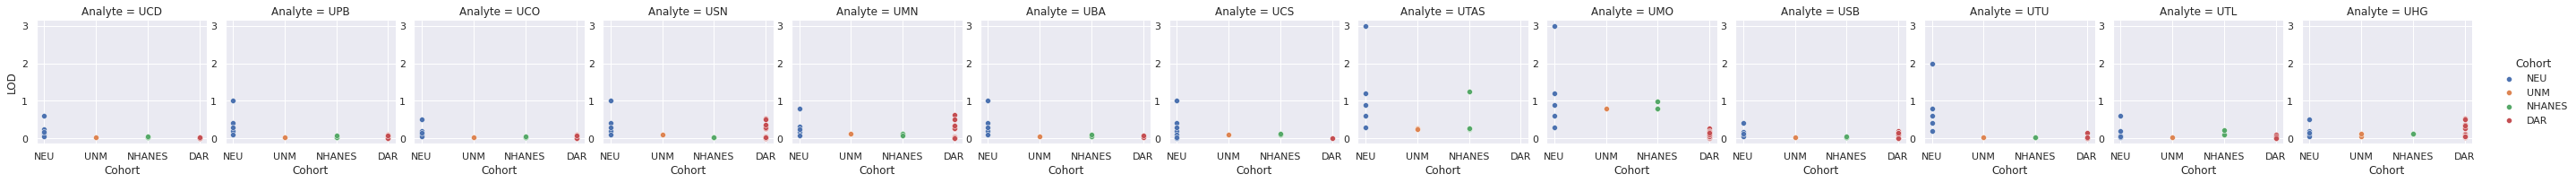

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(200, 150)})
g = sns.FacetGrid(df, col="Analyte", hue="Cohort")
g.map(sns.scatterplot, "Cohort", "LOD")
g.add_legend()
for axis in g.axes.flat:
    axis.tick_params(labelleft=True)
g.savefig('Lod_Scatterplots_DP_Paper.jpg', format = 'jpeg', dpi = 1000)

In [123]:
max_lod = df.groupby(['Analyte']).max().reset_index()
min_lod = df.groupby(['Analyte']).min().reset_index()

In [124]:
analytes = []
maxs = []
mins = []
for a in df['Analyte'].unique():
    analytes.append(a)
    maxs.append(max_lod[max_lod['Analyte']==a]['LOD'])
    mins.append(min_lod[min_lod['Analyte']==a]['LOD'])
lrange_df = pd.DataFrame(data = {'Analyte' : analytes, "Max_LOD" : maxs, 'Min_LOD' : mins})

In [125]:
import re
def mod_col(s):
    for n in re.findall('\d*\.?\d+',s):
        if '.'in n:
            return n

In [136]:
lrange_df['Max_LOD'] = lrange_df['Max_LOD'].apply(lambda x: mod_col(str(x)))
lrange_df['Min_LOD'] = lrange_df['Min_LOD'].apply(lambda x: mod_col(str(x)))
lrange_df = lrange_df.reset_index(drop=True).set_index('Analyte')
lrange_df

,Max_LOD,Min_LOD
Analyte,,
UCD,0.6,0.000297
UPB,1.0,0.005
UCO,0.5,0.001
USN,1.0,0.007373
UMN,0.8,0.001914
UBA,1.0,0.02
UCS,1.0,0.005
UTAS,3.0,0.23
UMO,3.0,0.01


In [137]:
lrange_df.to_csv('LOD_ranges.csv')

In [130]:
lrange_df[['Analyte', 'Max_LOD', 'Min_LOD']]

,Analyte,Max_LOD,Min_LOD
0,UCD,0.6,0.000297
1,UPB,1.0,0.005
2,UCO,0.5,0.001
3,USN,1.0,0.007373
4,UMN,0.8,0.001914
5,UBA,1.0,0.02
6,UCS,1.0,0.005
7,UTAS,3.0,0.23
8,UMO,3.0,0.01
9,USB,0.4,0.001
